#  English sequence generator 

Goal: Create an English language sequence generator capable of building semi-coherent English sentences from scratch by building them up character-by-character.

Dataset:  Complete version of Sir Arthur Conan Doyle's classic book The Adventures of Sherlock Holmes

Based on [RNN project: text generation](https://github.com/udacity/aind2-rnn) of the [Udacity's Artificial Intelligence  Nanodegree](https://www.udacity.com/course/artificial-intelligence-nanodegree--nd889)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper

## Load the data

In [2]:
text = open('data/holmes.txt').read().lower()
print('Total characters: {}'.format(len(text)))
text[:300]

Total characters: 581864


"\ufeffproject gutenberg's the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or "

## Preprocess the data

In [3]:
text = text[1302:]  # remove title, author page, and table of contents
text = text.replace('\n',' ') 
text = text.replace('\r',' ')

unique_characters = set(list(text))  
print(unique_characters)

{'f', 'p', 'm', 'é', 'x', 'h', 'v', 'j', '8', '0', 'b', 'z', '4', ';', '7', '5', 'i', 'à', '(', '"', '6', 'â', ',', 'w', '-', 'e', 'y', ':', '&', '$', '?', "'", 's', '2', 'q', '/', ')', '*', '!', ' ', '@', 't', 'k', 'l', '%', 'c', 'è', 'g', '.', '1', '3', 'd', 'o', 'r', 'u', 'n', 'a', '9'}


In [4]:
# remove non-english characters 
import re
text = re.sub("[$%&'()*@/àâèé0123456789-]", " ", text)
text = text.replace('"',' ')
text = text.replace('  ',' ') # shorten any extra dead space created above
text[:300]

'is eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine '

In [5]:
chars = sorted(list(set(text)))
num_chars = len(chars)
print('Total characters: {}'.format(len(text)))
print('Unique characters: {}'.format(num_chars))
print(chars)

Total characters: 573681
Unique characters: 33
[' ', '!', ',', '.', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


## Split data into input/output pairs

In [6]:
# Transforms the input text and window-size into a set of input/output pairs 
#  for use with the RNN """

window_size = 100
step_size = 5

input_pairs = []
output_pairs = []

for i in range(0, len(text) - window_size, step_size):
    input_pairs.append(text[i : i + window_size])   
    output_pairs.append(text[i + window_size])       

## One-hot encoding characters

In [7]:
chars_to_indices = dict((c, i) for i, c in enumerate(chars))
indices_to_chars = dict((i, c) for i, c in enumerate(chars))

# create variables for one-hot encoded input/output
X = np.zeros((len(input_pairs), window_size, num_chars), dtype=np.bool)
y = np.zeros((len(input_pairs), num_chars), dtype=np.bool)

# transform character-based input_pairs/output_pairs into equivalent numerical versions
for i, sentence in enumerate(input_pairs):
    for t, char in enumerate(sentence):
        X[i, t, chars_to_indices[char]] = 1
    y[i, chars_to_indices[output_pairs[i]]] = 1

## Recurrent Neural Network Model

Training ...
Epoch 1/100
114717/114717 [==============================] - 47s - loss: 2.6851    
Epoch 2/100
114717/114717 [==============================] - 47s - loss: 2.2580    
Epoch 3/100
114717/114717 [==============================] - 47s - loss: 2.1099    
Epoch 4/100
114717/114717 [==============================] - 48s - loss: 2.0035    
Epoch 5/100
114717/114717 [==============================] - 48s - loss: 1.9242    
Epoch 6/100
114717/114717 [==============================] - 47s - loss: 1.8629    
Epoch 7/100
114717/114717 [==============================] - 47s - loss: 1.8077    
Epoch 8/100
114717/114717 [==============================] - 47s - loss: 1.7596    
Epoch 9/100
114717/114717 [==============================] - 47s - loss: 1.7162    
Epoch 10/100
114717/114717 [==============================] - 47s - loss: 1.6757    
Epoch 11/100
114717/114717 [==============================] - 47s - loss: 1.6385    
Epoch 12/100
114717/114717 [==============================] -

114717/114717 [==============================] - 47s - loss: 0.3112    
Epoch 98/100
114717/114717 [==============================] - 48s - loss: 0.3076    
Epoch 99/100
114717/114717 [==============================] - 48s - loss: 0.3057    
Epoch 100/100
114717/114717 [==============================] - 48s - loss: 0.3049    
Training loss: 0.3049


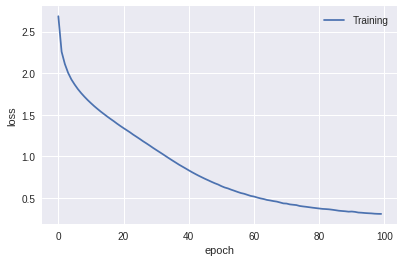

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import keras
import random

model = Sequential()  
model.add(LSTM(200, input_shape = (window_size, num_chars)))  
model.add(Dense(num_chars, activation=None))   
model.add(Dense(num_chars, activation="softmax")) 

optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=optimizer)


# train the model
callbacks = [keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)]
print("Training ...")
history = model.fit(X, y, batch_size=512, epochs=100,verbose=1, callbacks=callbacks)
# model.save_weights('models/text_generation_weights.hdf5')

helper.show_training(history)

## Make predictions

In [12]:
model.save_weights('models/text_generation_weights.hdf5')


def predict_next_chars(model,input_chars,num_to_predict):     
    """ predict a number of future characters """

    predicted_chars = ''
    for i in range(num_to_predict):
        x_test = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(input_chars):
            x_test[0, t, chars_to_indices[char]] = 1.

        test_predict = model.predict(x_test,verbose = 0)[0]

        # translate numerical prediction back to characters
        r = np.argmax(test_predict)
        d = indices_to_chars[r] 

        # update predicted_chars and input
        predicted_chars += d
        input_chars += d
        input_chars = input_chars[1:]
    return predicted_chars


for s in range(0,500,100):
    start_index = s
    input_chars = text[start_index: start_index + window_size]
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100)

    print('------------------')
    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)

    line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(line)

------------------
input chars = 
is eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin"

predicted chars = 
 of the morth, and i know the deaph of it, i leme to loave a come to my own witcoke in the dressiss."

------------------
input chars = 
 to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, preci"

predicted chars = 
st courtess the devely simple assurhy little beruer of a sistirater. the learoner of brivest about t"

------------------
input chars = 
se but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine "

predicted chars = 
that the promencill you nowe, we could see that concausiver me. by my disprive, the door was facts a"

------------------
input chars = 
that the world has seen, but as a lover he would have placed himself in a false position. he never s"

predicted chars = 
parmence as loom in his longrarce, papers, i despermentured this ci